In [1]:
import numpy as np
from atomdb import load, make_promolecule
import matplotlib.pyplot as plt
#from atomdb import dens_func, d_dens_func, dd_dens_func, ked_func

relevant functions from AtomDB library: 

dens_func:    Return a cubic spline of the electronic density.\
d_dens_func:  Return a cubic spline of the first derivative of the electronic density.\
dd_dens_func: Return a cubic spline of the electronic density Laplacian.\
ked_func:     Return a cubic spline of the kinetic energy density.


$\xi_{\sigma}(r) = \frac{\rho_{\sigma}(r) \kappa_{\sigma}^{BE}(r) [\rho_{\alpha}, \rho_{\alpha}]}{(2/3)\{(3/10)(6\pi^2)^{2/3} \rho_{\sigma}^{5/3}(r)\}}$\
$\rho(r) = $ dens\
$\kappa_{\sigma}^{BE}(r) [\rho_{\alpha}, \rho_{\alpha}]=  \frac{2}{3} \frac{\tau_{\sigma}(r) - \tau_{\sigma}^{W}(r)}{\rho_{\sigma}}$\
$\tau_{\sigma}=$ ked_func\
$\tau_{\sigma}^{W}(r)=\sum_{i=1}^{N_{\sigma}} \frac{\nabla \rho(r) \nabla \rho(r)}{8 \rho_{\sigma}(r)}$:

In [33]:
def edgecomb_localisation(ato_obj,grid):
    # returns edgecomb localisation function as an array
    dens  = ato_obj.density(grid)
    d_dens  = ato_obj.gradient(grid)
    ked  = ato_obj.ked(grid)
    ddens_2 = np.zeros(dens.shape)
    for i in range(0,d_dens.shape[0]):
        ddens_2[i] = np.matmul(d_dens[i,:], d_dens[i,:])
        
    Weizaecker = ddens_2/(8.0*dens)
    Becke_Edge = 2/3*(ked-Weizaecker)/(dens)
    edgecomb = (3/2*dens*Becke_Edge)/(3/10*(6*np.pi**2)**(2/3)*dens**(5/3))
    return edgecomb, dens, d_dens, ked, Weizaecker


In [68]:
# Atomic number of each center
atnums = [36, 4]

# Spatial coordinates of each center
atcoords = np.array(
    [
        [-1.0, 0.0, 0.0],
        [1.0, 0.0, 0.0],
    ],
    dtype=float,
)


# Make promolecule instance
be2_promol = make_promolecule(atnums=atnums, coords=atcoords, dataset="gaussian")

SHA256 hash of downloaded file: 0f5ded732a733fa2cde91f6ba828f8fcf76c1359e8b38eed1be436a2a89a32ea
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [69]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

grid = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T

In [70]:
# qunatities on a grid
edgecomb, rho, grad_rho, ked, Weizaecker = edgecomb_localisation(be2_promol,grid)


(10000,) (10000, 3) (10000,)


In [71]:
# Paul Ayers Transformation
L = np.tanh(edgecomb**(-1)-edgecomb)

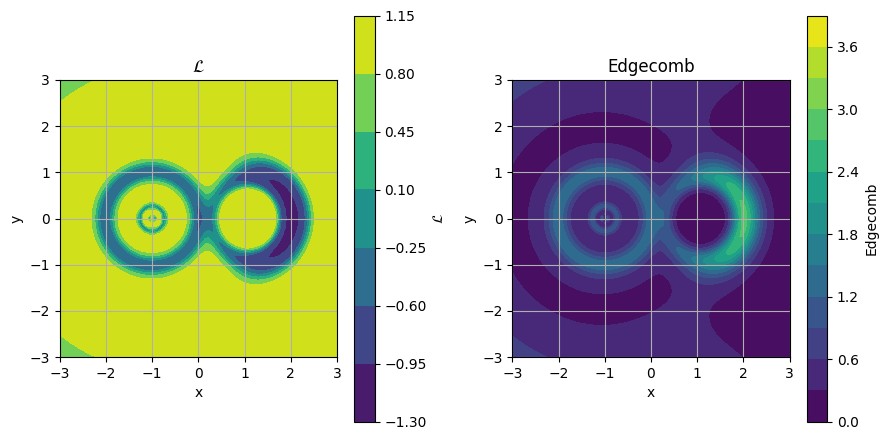

In [72]:
# Assuming you have defined X, Y, rho, and grad_rho appropriately

# Set contour levels for electron density and kinetic energy density
density_levels = np.arange(-1.3, 1.3, 0.35)
ked_levels = np.arange(0, 4, 0.3)
# Create a new figure with two subplots
fig = plt.figure(figsize=(9, 4.5))

# Add electron density subplot
ax1 = fig.add_subplot(121)
density_plot = ax1.contourf(X, Y, L.reshape(X.shape), levels=density_levels)
ax1.set_title(r"$\mathcal{L}$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")
ax1.grid(True)
fig.colorbar(density_plot, ax=ax1, label=r"$\mathcal{L}$")

# Add kinetic energy density subplot
ax2 = fig.add_subplot(122)
ked_plot = ax2.contourf(X, Y, edgecomb.reshape(X.shape), levels=ked_levels)
ax2.set_title("Edgecomb")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_aspect("equal")
ax2.grid(True)
fig.colorbar(ked_plot, ax=ax2, label="Edgecomb")

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the figure
plt.show()